# Análisis de puntos influyentes

* Es necesario detectar la existencia de puntos que pueden influir en la determinación del modelo (si cambian o no los parámetros)
* Outliers (valor atípico) son datos que se apartan mucho de la tendencia general pueden cambiar sustancialmente las estimaciones del modelo
* Si el outlier corresponde a un error de tipeo o un dato mal registradom se lo puede eliminar o corregir

# 1. Ejemplo

# 2. Librerias

In [2]:
library(ggplot2)
library(GGally)

In [3]:
setwd("/Users/ppando/Materias/data/materias/aprendizaje-automatico/bd")

In [4]:
# Lectura de archivo
grasas_o <- read.csv("GrasasConOutlier.csv", header = TRUE, sep = ";")


In [5]:
# Visualización de variables
names(grasas_o)

[1] "peso"   "edad"   "grasas"

# 3. Gráfico de dispersión de todas las variables

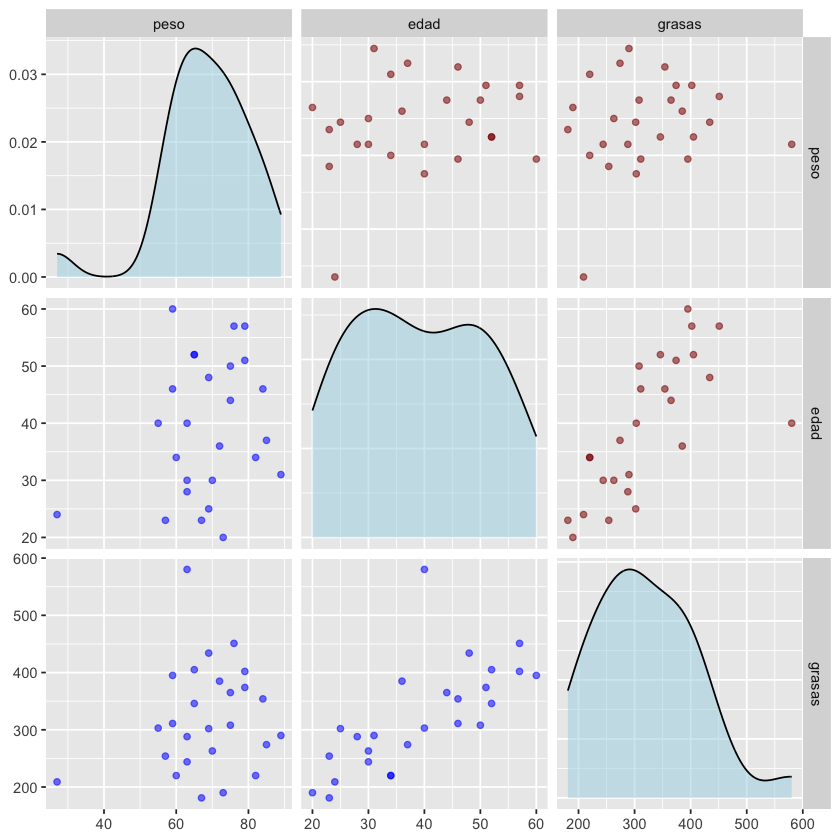

In [6]:
ggpairs(grasas_o,
        columns = 1:3,
        mapping = aes(alpha = 0.9),
        upper = list(continuous = wrap("points", color = "darkred")),
        lower = list(continuous = wrap("points", color = "blue")),
        diag = list(continuous = wrap("densityDiag", fill = "lightblue")))

# 4. Gráfico de dispersión de las variables involucradas en el modelo

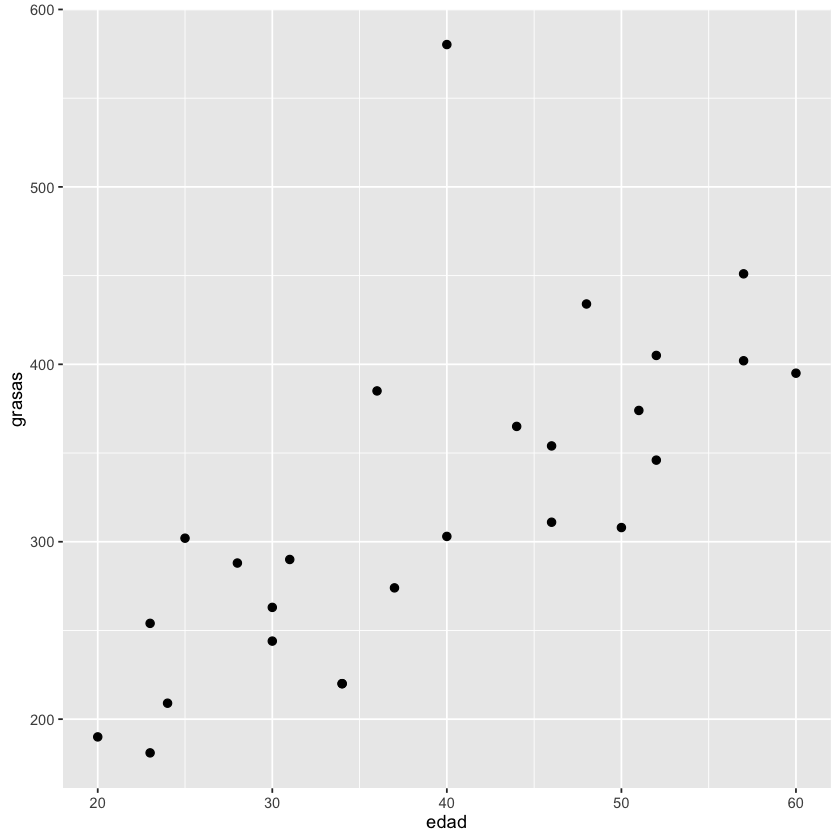

In [7]:
ggplot(data = grasas_o, aes(x = edad, y = grasas)) + 
    geom_point(size = 2)

# 5. Modelo de regresión lineal

In [8]:
modelo_o <- lm(formula = grasas ~ edad, data = grasas_o)
summary(modelo_o)


Call:
lm(formula = grasas ~ edad, data = grasas_o)

Residuals:
   Min     1Q Median     3Q    Max 
-73.34 -37.60 -13.00  19.36 254.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  110.324     46.304   2.383   0.0255 *  
edad           5.383      1.133   4.753 7.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.97 on 24 degrees of freedom
Multiple R-squared:  0.4849,	Adjusted R-squared:  0.4634 
F-statistic: 22.59 on 1 and 24 DF,  p-value: 7.784e-05


# 6. Diagnóstico del modelo

## 6.1 Análisis de los residuos

### 6.1.1 Plot de residuos estandarizados vs predichos

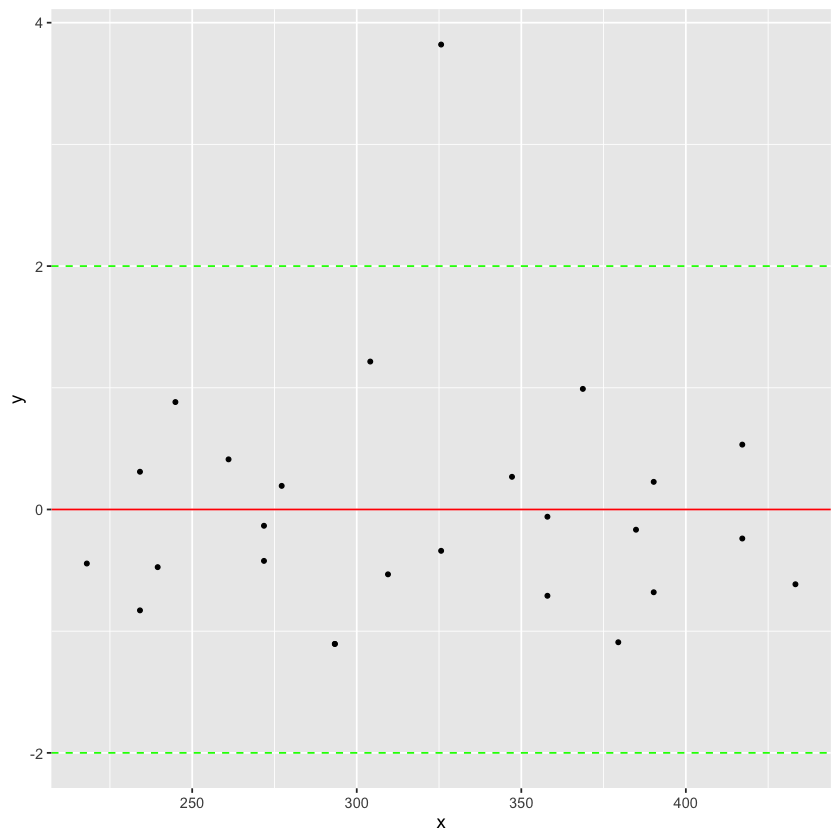

In [9]:
res_df_o <- data.frame(x = modelo_o$fitted.values, y = rstandard(modelo_o))

ggplot(data = res_df_o, aes(x, y)) +
  geom_point(size = 1) +
  geom_hline(yintercept = 0, color = "red") +
  geom_hline(yintercept = -2, color = "green", linetype = "dashed") +
  geom_hline(yintercept = 2, color = "green", linetype = "dashed")

* Corroboro que es un outlier porque tiene un residuo cuyo valor es mas grande que 2

### 6.1.2 Qqnorm de residuos estandarizados

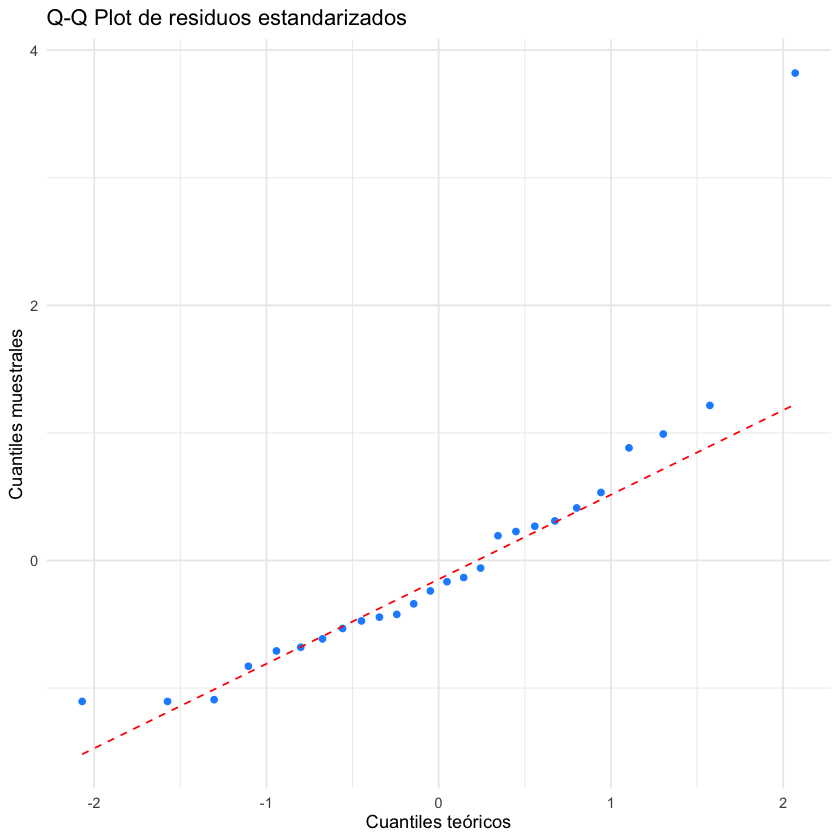

In [10]:
ggplot(data = data.frame(residuos = rstandard(modelo_o)), aes(sample = residuos)) +
  stat_qq(color = "dodgerblue") +
  stat_qq_line(color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Q-Q Plot de residuos estandarizados",
       x = "Cuantiles teóricos",
       y = "Cuantiles muestrales")

## 6.2 Detección de outliers

* Los outliers son observaciones con residuos altos
* Podemos ordenar los residuos estandarizados y elegir las observaciones que sean más grandes que 2 y las que sean menores a -2

### 6.2.1 Opción 1

In [11]:
umbral1 <- rstandard(modelo_o)[rstandard(modelo_o) > 2]
umbral2 <- rstandard(modelo_o)[rstandard(modelo_o) < -2]

umbral1 # muestra observación y residuo
umbral2 # no muestra porque no hay

26 
3.820361

named numeric(0)

### 6.2.2 Opción 2

In [12]:
outliers <- which(abs(rstandard(modelo_o)) > 2)
outliers # solo muestra el número de observación NO el residuo

26 
26

### 6.2.3 Opción 3

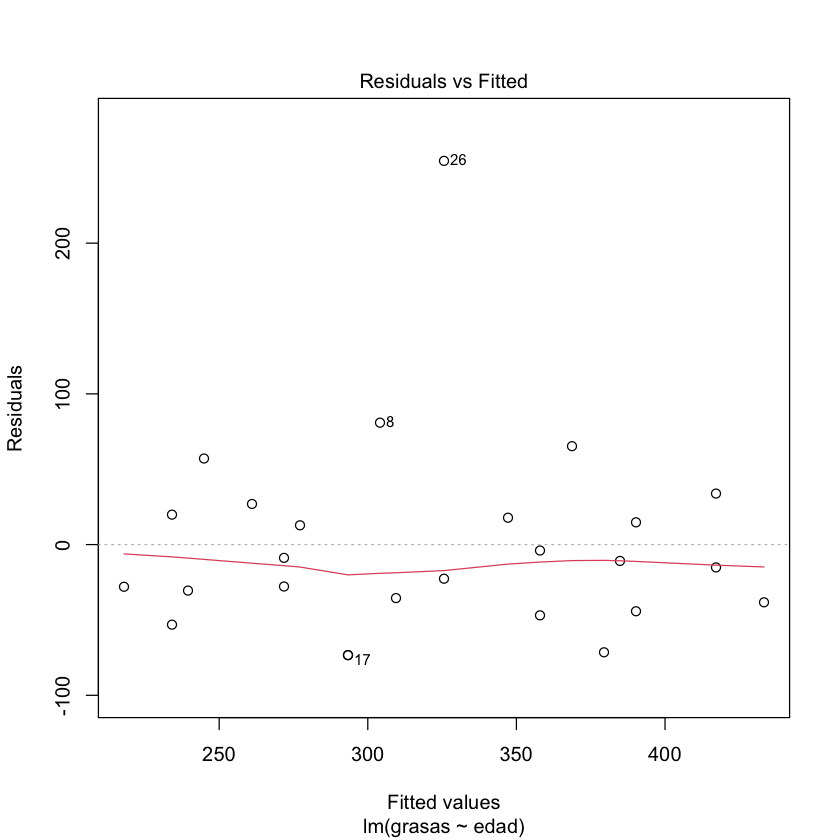

In [13]:
plot(modelo_o, which = 1) # Residuos vs Predichos

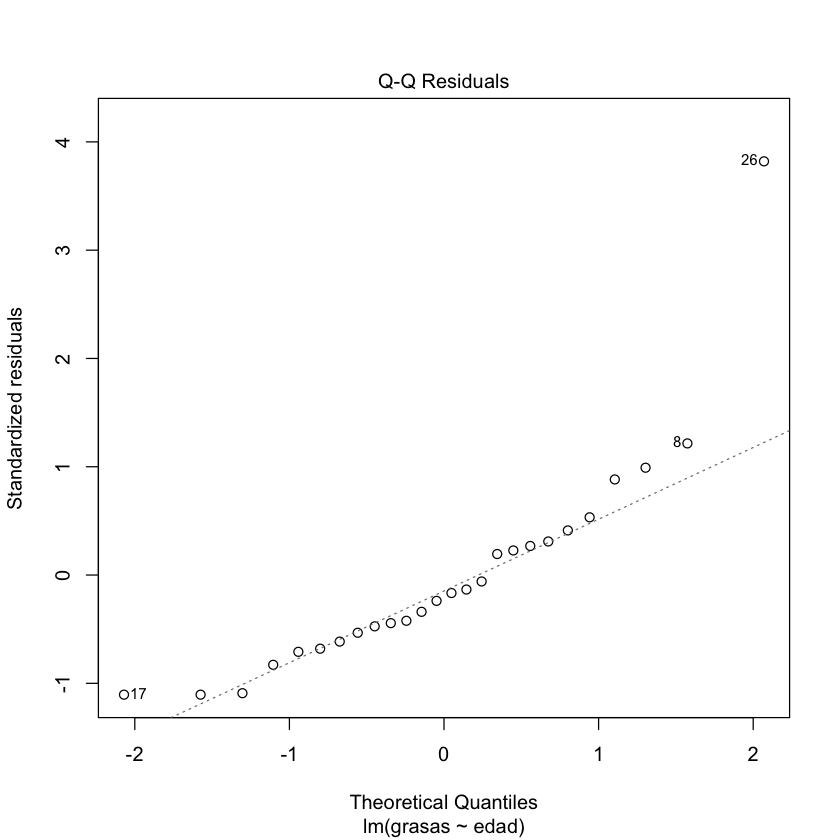

In [14]:
plot(modelo_o, which = 2) # qqplot

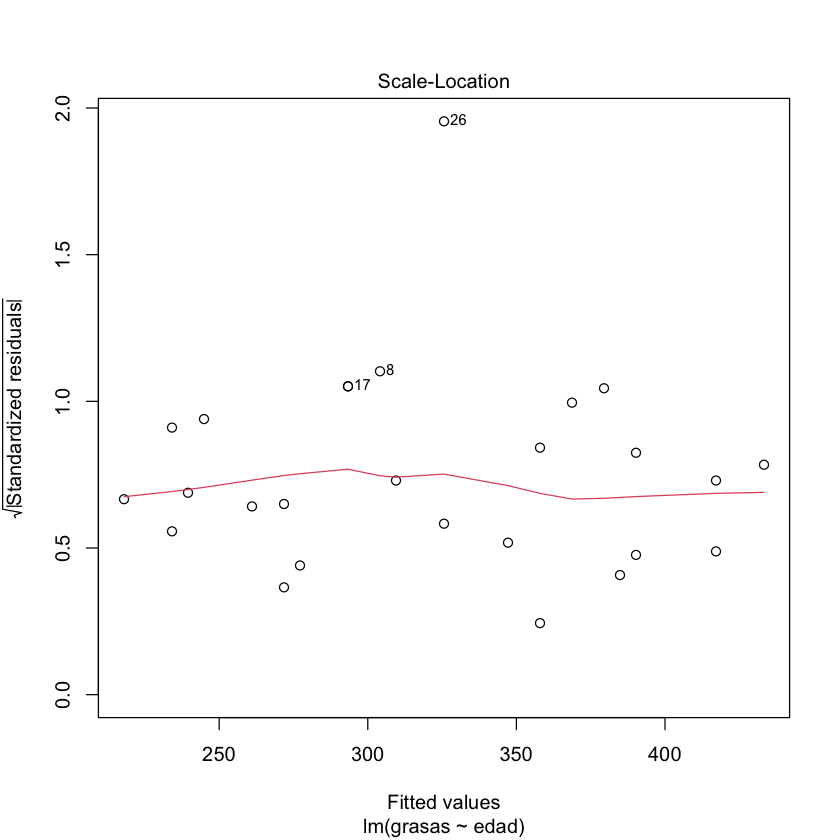

In [15]:
plot(modelo_o, which = 3) # raiz cuadrada de los residuos estandarizados vs predichos

# 7. Análisis de la regresión sin el outlier

## 7.1 Quito la observación

In [18]:
grasas_sin_o <- grasas_o[-26,]  # si habria mas observaciones [-c(26, 30), ]
dim(grasas_sin_o)

[1] 25  3

## 7.2 Planteamos de un modelo de regresión lineal

In [19]:
modelo_sin_o <- lm(formula = grasas ~ edad, data = grasas_sin_o)
summary(modelo_sin_o)


Call:
lm(formula = grasas ~ edad, data = grasas_sin_o)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.478 -26.816  -3.854  28.315  90.881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 102.5751    29.6376   3.461  0.00212 ** 
edad          5.3207     0.7243   7.346 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.46 on 23 degrees of freedom
Multiple R-squared:  0.7012,	Adjusted R-squared:  0.6882 
F-statistic: 53.96 on 1 and 23 DF,  p-value: 1.794e-07


## 7.3 Análisis de los residuos

### 7.3.1 Plot de residuos estandarizados vs predichos

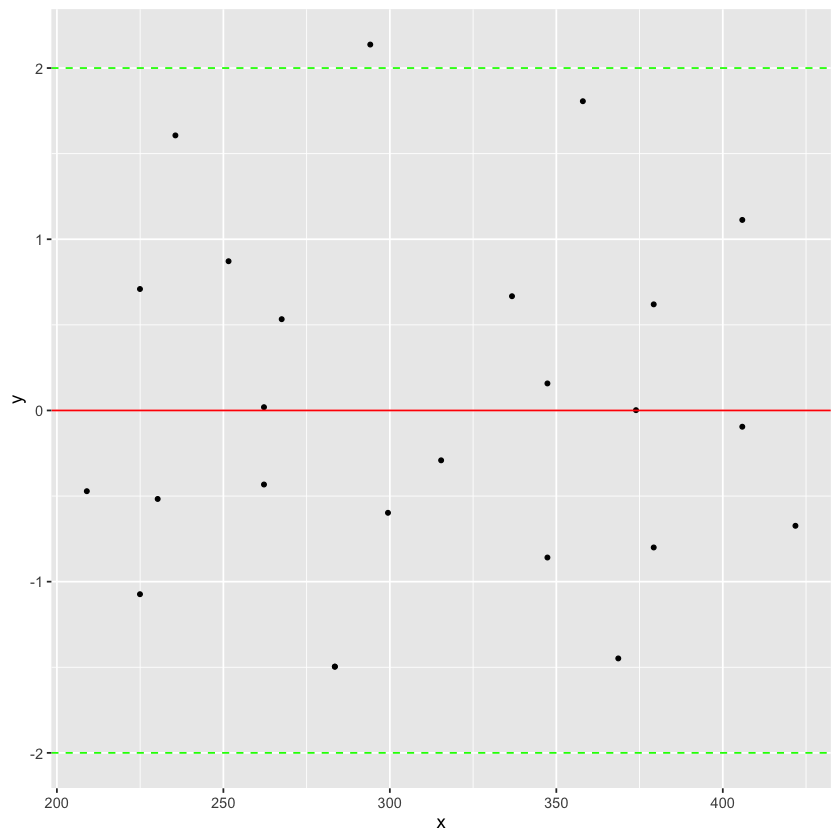

In [20]:
res_df_sin_o <- data.frame(x=modelo_sin_o$fitted.values, y=rstandard(modelo_sin_o))

ggplot(data=res_df_sin_o, aes(x,y)) +
  geom_point(size=1) +
  geom_hline(yintercept = 0, color="red") +
  geom_hline(yintercept = -2, color="green", linetype="dashed") +
  geom_hline(yintercept = 2, color="green", linetype="dashed")

### 7.3.2 Qqnorm de residuos estandarizados

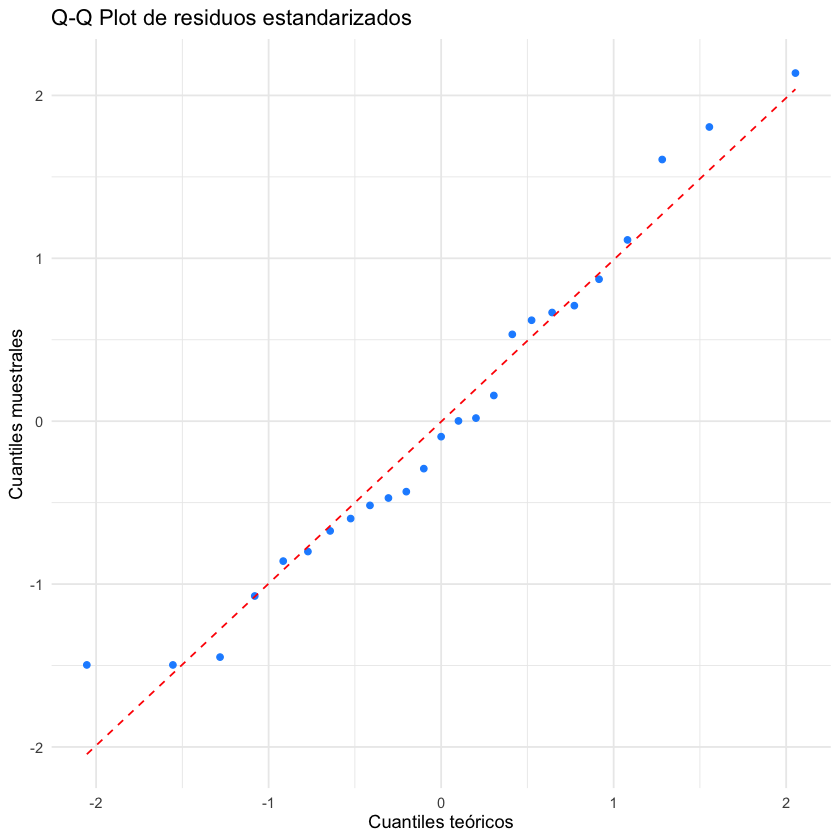

In [21]:
ggplot(data = data.frame(residuos = rstandard(modelo_sin_o)), aes(sample = residuos)) +
  stat_qq(color = "dodgerblue") +
  stat_qq_line(color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Q-Q Plot de residuos estandarizados",
       x = "Cuantiles teóricos",
       y = "Cuantiles muestrales")

* Veo que se validan las hipótesis de mi modelo
* Entonces, bajo el martillo, y digo ME QUEDO CON ESTE MODELO

# 8. Puntos de alto leverage (palanca)

* También son puntos influyentes
* Son observaciones: x muy alejadas de la media de las x (en horizontal)
* Afecta a la varianza de los residuos
* Puede ser:
    * **buena**: no altera a la ecuación de la recta, residuo bajo (no muy alejada de la recta)
    * **mala**: residuo ALTO (efecto palanca), cambia la recta y por lo tanto cambia la predicción. Hay que eliminar el punto

## 8.1 Ejemplo 1

### 8.1.1 Lectura del archivo y visualización de datos

In [25]:
grasas_lev <- read.csv("GrasasConLeverage.csv", header = TRUE, sep = ";")
names(grasas_lev)

[1] "peso"   "edad"   "grasas"

### 8.1.2 Gráfico de dispersión de las variables involucradas en el modelo

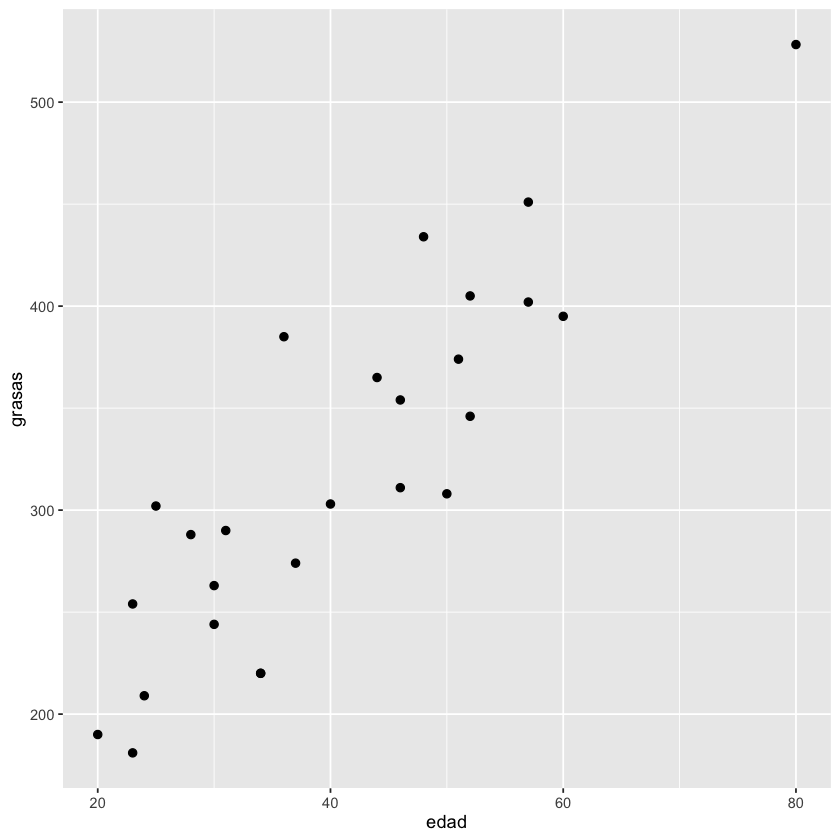

In [26]:
ggplot(data = grasas_lev, aes(x = edad, y = grasas)) +
  geom_point(size = 2)

### 8.1.3 Modelo de regresión lineal

In [28]:
modelo_lev <- lm(formula = grasas ~ edad, data = grasas_lev)
summary(modelo_lev)


Call:
lm(formula = grasas ~ edad, data = grasas_lev)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.478 -26.471  -1.928  27.674  90.881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 102.5760    25.4011   4.038 0.000478 ***
edad          5.3207     0.5896   9.024 3.51e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.55 on 24 degrees of freedom
Multiple R-squared:  0.7724,	Adjusted R-squared:  0.7629 
F-statistic: 81.44 on 1 and 24 DF,  p-value: 3.508e-09


### 8.1.4 Diagnóstico del modelo

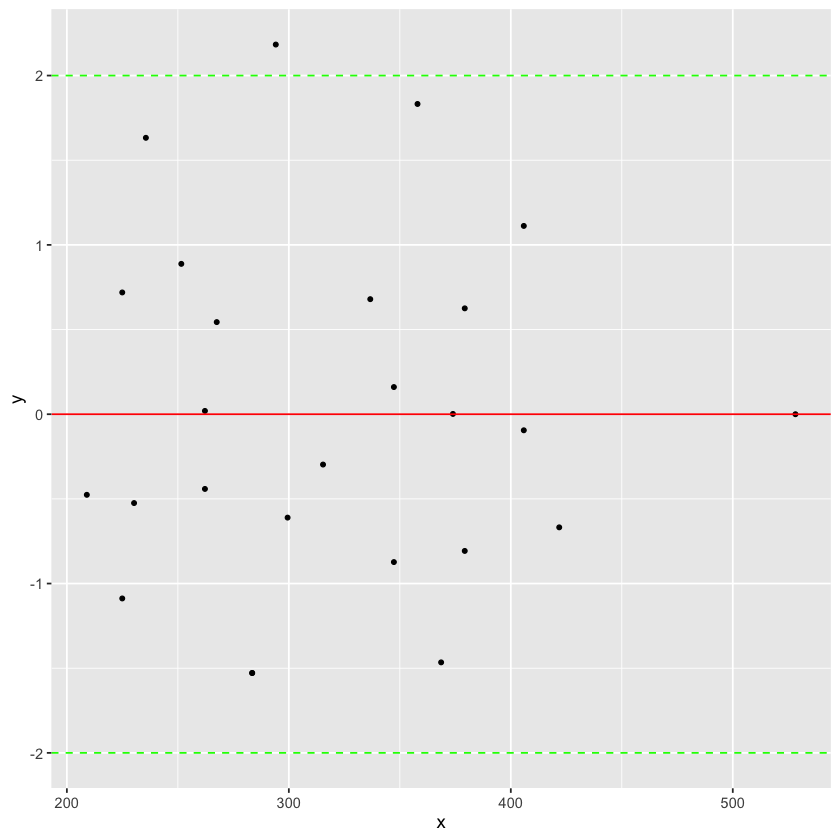

In [29]:
# Plot de residuos estandarizados vs predichos
res_df_lev <- data.frame(x = modelo_lev$fitted.values, y = rstandard(modelo_lev))

ggplot(data = res_df_lev, aes(x, y)) +
  geom_point(size = 1) +
  geom_hline(yintercept = 0, color = "red") +
  geom_hline(yintercept = -2, color = "green", linetype = "dashed") +
  geom_hline(yintercept = 2, color = "green", linetype = "dashed")

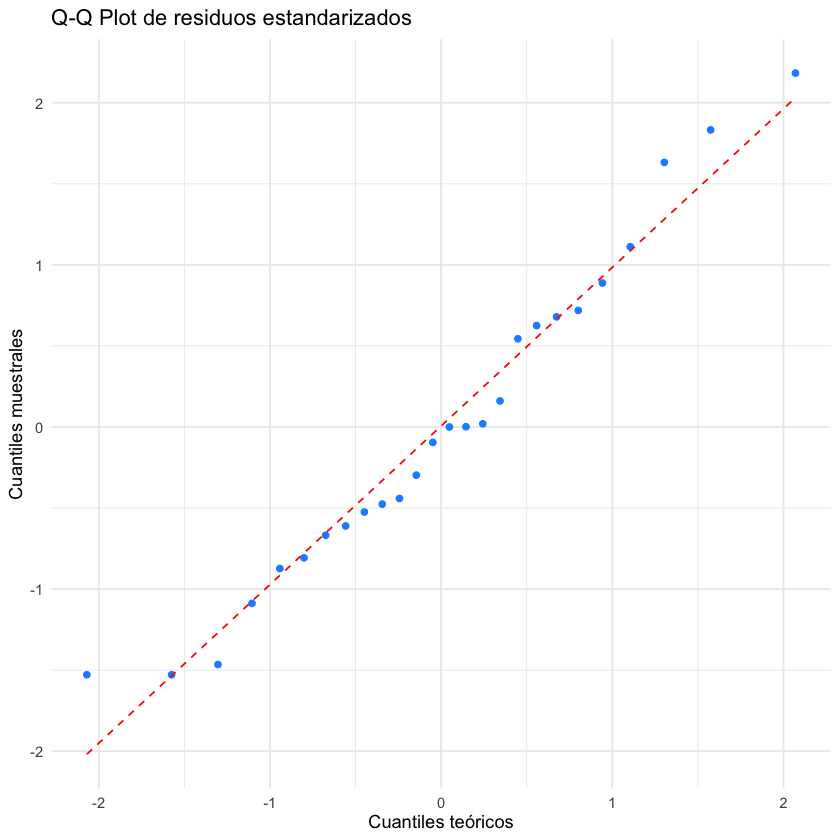

In [30]:
# Qqnorm de residuos estandarizados
ggplot(data = data.frame(residuos = rstandard(modelo_lev)), aes(sample = residuos)) +
  stat_qq(color = "dodgerblue") +
  stat_qq_line(color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Q-Q Plot de residuos estandarizados",
       x = "Cuantiles teóricos",
       y = "Cuantiles muestrales")

### 8.1.5 Detección de puntos de alto leverage

#### 8.1.5.1 Opción 1

In [31]:
leverage <- hatvalues(modelo_lev) # me da los hii
p <- 2
umbral_lev <- 2 * p / length(grasas_lev$edad)
altolev <- leverage[leverage > umbral_lev]
altolev

26 
0.335165

#### 8.1.5.2 Opción 2

In [32]:
leverage_op2 <- which(abs(leverage) > umbral_lev)
leverage_op2

26 
26

## 8.2 Análisis de la regresión sin el punto de alto leverage

### 8.2.1 Quito la observación

In [34]:
grasas_sin_lev <- grasas_lev[-26,]

### 8.2.2 Planteamos un modelo de regresión lineal

In [35]:
modelo_sin_lev <- lm(formula = grasas ~ edad, data = grasas_sin_lev)
summary(modelo_sin_lev)


Call:
lm(formula = grasas ~ edad, data = grasas_sin_lev)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.478 -26.816  -3.854  28.315  90.881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 102.5751    29.6376   3.461  0.00212 ** 
edad          5.3207     0.7243   7.346 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.46 on 23 degrees of freedom
Multiple R-squared:  0.7012,	Adjusted R-squared:  0.6882 
F-statistic: 53.96 on 1 and 23 DF,  p-value: 1.794e-07


### 8.2.3 Análisis de los residuos

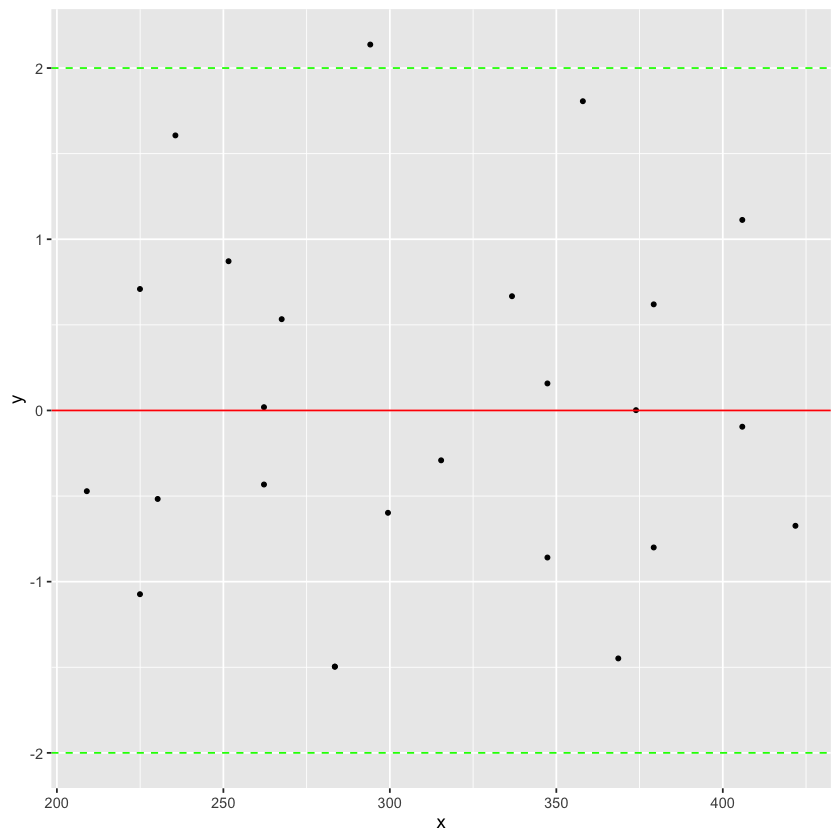

In [37]:
# Plot de residuos estandarizados vs predichos
res_df_sin_lev <- data.frame(x=modelo_sin_lev$fitted.values, y=rstandard(modelo_sin_lev))

ggplot(data=res_df_sin_lev, aes(x,y)) +
  geom_point(size=1) +
  geom_hline(yintercept = 0, color="red") +
  geom_hline(yintercept = -2, color="green", linetype="dashed") +
  geom_hline(yintercept = 2, color="green", linetype="dashed")

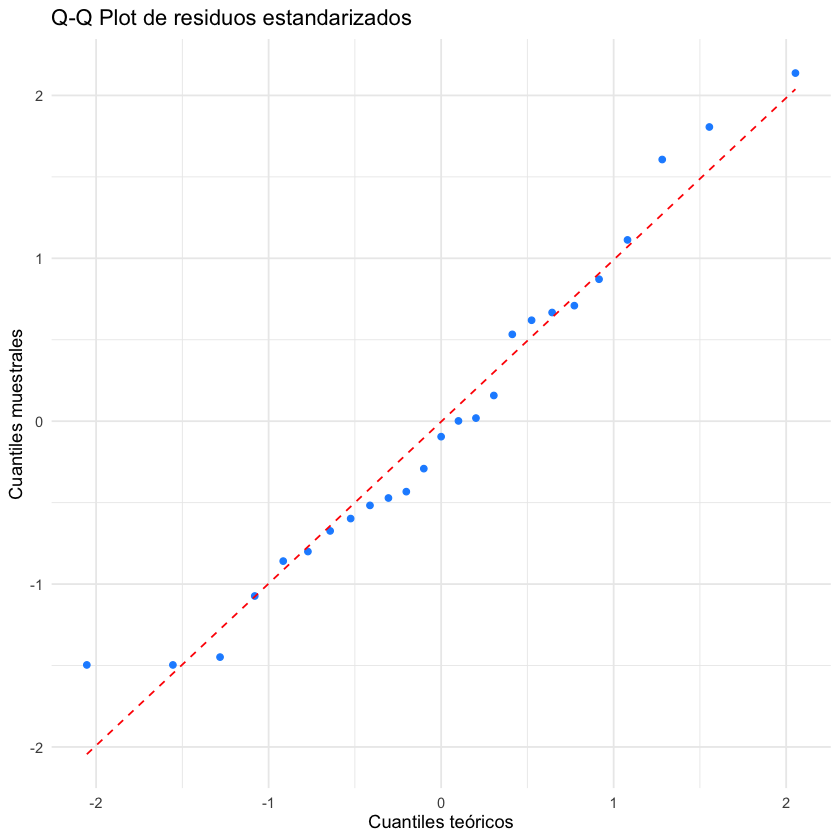

In [38]:
# Qqnorm de residuos estandarizados
ggplot(data = data.frame(residuos = rstandard(modelo_sin_lev)), aes(sample = residuos)) +
  stat_qq(color = "dodgerblue") +
  stat_qq_line(color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Q-Q Plot de residuos estandarizados",
       x = "Cuantiles teóricos",
       y = "Cuantiles muestrales")

* Se observa que se validan todos los supuestos

## 8.3 Ejemplo 2

### 8.3.1 Lectura del archivo y visualización de variables

In [54]:
grasas_lev2 <- read.csv("GrasasConLeverage2.csv", header = TRUE, sep = ";")
names(grasas_lev2)

Warning message in file(file, "rt"):
“no fue posible abrir el archivo 'GrasasConLeverage2.csv': No such file or directory”


ERROR: Error in file(file, "rt"): no se puede abrir la conexión


# 9. Distancia de Cook

* Di: Mide la influencia de la observación i sobre todos los valores ajustados del modelo (es decir, valores predichos)
* Combina medidas de alto leverage con residuos altos
* Una observación con alto leverage va a saltar que tiene una distancia de Cook grande
* Una observación con residuos estandarizado alto también va a saltar que tiene una distancia de Cook grande
* Como mido la distancia de Cook? con cooks.distance(modelo)
* El umbral es el qf (distribución de Fisher) con n - 2 grados de libertad

### Modelo con outlier

In [55]:
cooks_o <- cooks.distance(modelo_o)
p <- length(coef(modelo_o))
n <- dim(grasas_o)[1]
cooks_umbral_o <- qf(0.5, p, n-p)

In [56]:
# Puntos con distancia de Cook alta
x <- cooks_o[cooks_o > cooks_umbral_o]
x

named numeric(0)

### Modelo con alto leverage

In [57]:
cooks_lev <- cooks.distance(modelo_lev)
p <- length(coef(modelo_lev))
n <- dim(grasas_lev)[1]
cooks_umbral_lev <- qf(0.5, p, n-p)

In [58]:
# Opción 1
x <- cooks_lev[cooks_lev > cooks_umbral_lev]
x

named numeric(0)

In [59]:
# Opción 2
cooks <- which(cooks_lev > cooks_umbral_lev)
cooks

named integer(0)

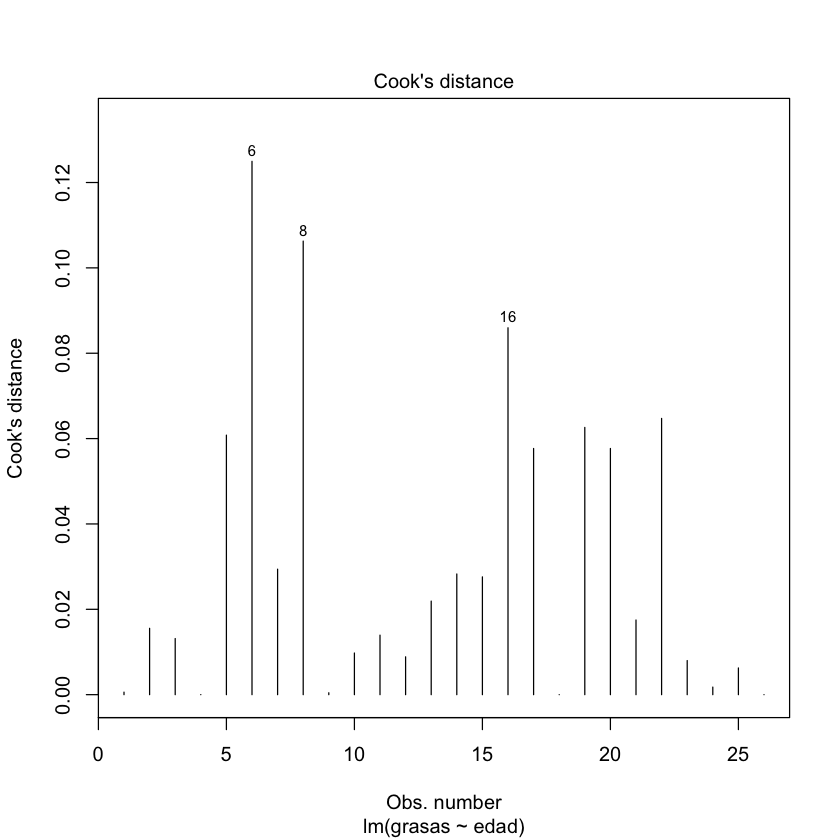

In [60]:
# Opción 3
plot(modelo_lev, which = 4)